**PROJET STATISTIQUES :**


Il s'agit de trouver des données sur internet (Kaggle, site de l'Insee, data.gov, data.gouv.fr, etc.) et de les étudier.
Ce n'est pas utile de prendre une grosse base de données (mais pas interdit non plus).

Ensuite il faut choisir une ou des grandeurs d'intérêt, construire un ou deux estimateurs et de tester leurs propriétés sur les données,
en effectuant quelques calculs théoriques (si possible) et en visualisant les données et leurs propriétés.
Vous pouvez choisir les sujets de TP comme base de travail et les reprendre en R ou en Python, avec les données proposées ou bien d'autres données.

# BIBLIOTHEQUES


In [40]:
# Manipulate dataset
import warnings
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Test de loi
import scipy.stats as stats
from scipy.stats import norm, expon, gamma, pareto, beta, lognorm, cauchy, weibull_min, shapiro, kstest # Lois continues

# Graine aléatoire
np.random.seed(241)


# JEU DE DONNEES

## Importation du jeu de données

**Descriptif du jeu de données :**

Ce jeu de données contient des informations sur les logements à Ames, une ville située dans l'État de l'Iowa, aux États-Unis, incluant des caractéristiques relatives aux propriétés résidentielles comme la superficie, le type de construction, et les finitions intérieures.

> Nombre de variables : 80 caractéristiques + 1 cible

> Taille : 2 930 observations  

> Objectif pour la régression : Prédire le prix de vente des maisons (SalePrice).

> Objectif pour la classification binaire : Prédire si le prix de vente dépasse un certain seuil défini.  

In [41]:
# Loading dataset
data = pd.read_csv('AmesHousing.csv')

# Affichage de quelques lignes
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**Descriptif des variables :**

Le dataset AmesHousing contient 81 variables décrivant différentes caractéristiques des maisons, leurs environnements, et leurs prix de vente.
Voici les principales catégories de variables :

> Cible  
- SalePrice : Prix de vente de la maison (en dollars).

> Informations générales  
- MSSubClass : Type de logement (identifiant numérique).  
- MSZoning : Catégorie de zonage pour l'utilisation des propriétés (par ex. résidentielle, industrielle).  
- LotFrontage : Longueur de façade de la propriété (en pieds).  
- LotArea : Surface totale du terrain (en pieds carrés).  
- Street : Type de rue d'accès (pavée ou gravier).  
- Alley : Type d'allée d'accès (si disponible).  
- LotShape : Forme générale de la propriété (par ex. régulière ou irrégulière).  
- LandContour : Niveau du terrain autour de la propriété.  
- Utilities : Services publics disponibles (par ex. électricité, gaz).  
- LotConfig : Configuration de la propriété (par ex. coin, intérieure).  
- LandSlope : Pente du terrain.  

> Informations sur les bâtiments  
- YearBuilt : Année de construction du logement.  
- YearRemodAdd : Année de la dernière rénovation ou amélioration.  
- OverallQual : Qualité globale de la maison (évaluée de 1 à 10).  
- OverallCond : Condition globale de la maison (évaluée de 1 à 10).  
- RoofStyle : Type de toit (par ex. à deux versants, plat).  
- RoofMatl : Matériau de la toiture.  
- Exterior1st : Matériau de revêtement extérieur (principal).  
- Exterior2nd : Matériau de revêtement extérieur (secondaire).  
- ExterQual : Qualité du revêtement extérieur.  
- ExterCond : Condition du revêtement extérieur.  
- Foundation : Type de fondation (par ex. béton coulé, briques).  

> Caractéristiques internes  
- BsmtQual : Hauteur sous plafond du sous-sol.  
- BsmtCond : Condition générale du sous-sol.  
- BsmtExposure : Degré d'exposition du sous-sol (fenêtres, etc.).  
- BsmtFinType1 : Qualité d'aménagement de la première zone finie du sous-sol.  
- BsmtFinSF1 : Surface finie du sous-sol pour la première zone (en pieds carrés).  
- BsmtFinType2 : Qualité d'aménagement de la seconde zone finie du sous-sol.  
- BsmtFinSF2 : Surface finie du sous-sol pour la seconde zone (en pieds carrés).  
- BsmtUnfSF : Surface non aménagée du sous-sol (en pieds carrés).  
- TotalBsmtSF : Surface totale du sous-sol (en pieds carrés).  
- Heating : Type de chauffage.  
- HeatingQC : Qualité et condition du système de chauffage.  
- CentralAir : Système de climatisation central (oui/non).  
- Electrical : Type de système électrique.  
- 1stFlrSF : Surface habitable du premier étage (en pieds carrés).  
- 2ndFlrSF : Surface habitable du deuxième étage (en pieds carrés).  
- LowQualFinSF : Surface aménagée de faible qualité (en pieds carrés).  
- GrLivArea : Surface habitable totale au-dessus du sol (en pieds carrés).  
- BsmtFullBath : Nombre de salles de bain complètes au sous-sol.  
- BsmtHalfBath : Nombre de demi-salles de bain au sous-sol.  
- FullBath : Nombre de salles de bain complètes au-dessus du sol.  
- HalfBath : Nombre de demi-salles de bain au-dessus du sol.  
- BedroomAbvGr : Nombre de chambres au-dessus du sol.  
- KitchenAbvGr : Nombre de cuisines au-dessus du sol.  
- KitchenQual : Qualité de la cuisine.  
- TotRmsAbvGrd : Nombre total de pièces au-dessus du sol (hors salles de bain).  
- Functional : État fonctionnel de la maison.  

> Caractéristiques extérieures  
- Fireplaces : Nombre de cheminées.  
- FireplaceQu : Qualité des cheminées.  
- GarageType : Type de garage.  
- GarageYrBlt : Année de construction du garage.  
- GarageFinish : Type d'aménagement intérieur du garage.  
- GarageCars : Capacité du garage en nombre de voitures.  
- GarageArea : Surface du garage (en pieds carrés).  
- GarageQual : Qualité du garage.  
- GarageCond : Condition générale du garage.  
- PavedDrive : Type d'allée pavée.  

> Autres informations  
- WoodDeckSF : Surface de la terrasse en bois (en pieds carrés).  
- OpenPorchSF : Surface du porche ouvert (en pieds carrés).  
- EnclosedPorch : Surface du porche fermé (en pieds carrés).  
- 3SsnPorch : Surface du porche trois saisons (en pieds carrés).  
- ScreenPorch : Surface du porche grillagé (en pieds carrés).  
- PoolArea : Surface de la piscine (en pieds carrés).  
- PoolQC : Qualité de la piscine.  
- Fence : Qualité de la clôture.  
- MiscFeature : Caractéristiques supplémentaires (par ex. cabane de jardin).  
- MiscVal : Valeur des caractéristiques supplémentaires (en dollars).

# DEFINITION DU CADRE D'ETUDE

Pour notre étude nous décidons de travailler sur la variable SalePrice.

In [42]:
# Vérification des valeurs nulle de SalePrice
null_values = data['SalePrice'].isnull().sum()
print(f"Nombre de valeurs manquantes de 'SalePrice': {null_values}")

Nombre de valeurs manquantes de 'SalePrice': 0


Nous faisons le choix d'étudier la variable Sale Price qui devrait suivre une loi Normale.

Vérifions si l'intuition sur cette loi correspond bien notre distribution.

## Exploration de la variable cible

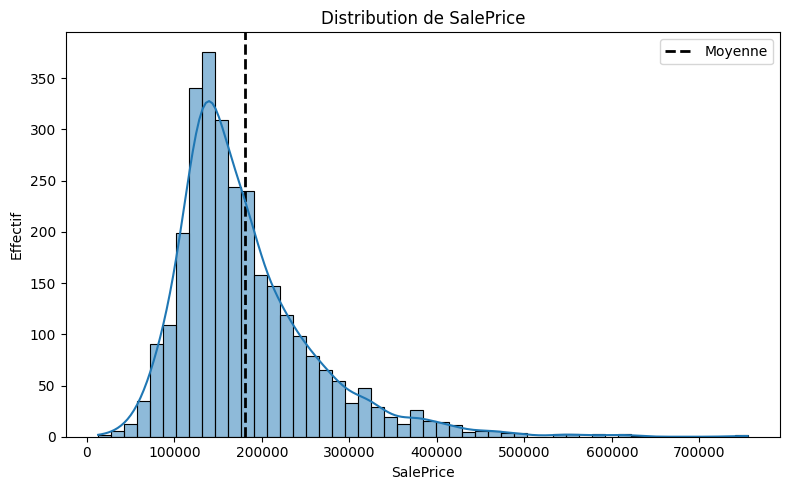

In [43]:
# histogramme de distribution de SalePrice
plt.figure(figsize=(8, 5))
plt.axvline(data['SalePrice'].mean(), color='black', linestyle='--', linewidth=2, label='Moyenne')
sns.histplot(data['SalePrice'], bins=50, kde=True, edgecolor='black')
plt.legend()

plt.xlabel('SalePrice')
plt.ylabel('Effectif')
plt.title('Distribution de SalePrice')

plt.tight_layout()
plt.show()


On remarque un certain étalement de valeurs à droite, ce qui indiquerait que quelques maisons ont un prix de vente particulièrement élévé. Ce qui fait éloigné la valeur de la moyenne de la médiane. Une première intuition seraoit déjà de se dire que ce décalage pourrait influence nos tests de loi vers des resultats non significatifs.

Dans un premier temps on se limitera à tester toutes les lois continues usuelles que nous avons étudier.

Distribution: exponentielle
  KS Statistic: 0.3275
  p-value: 2.214428581865937e-280
  La distribution est significativement rejetée

Distribution: normale
  KS Statistic: 0.1234
  p-value: 2.363180425244251e-39
  La distribution est significativement rejetée

Distribution: gamma
  KS Statistic: 0.1132
  p-value: 3.584562763680943e-33
  La distribution est significativement rejetée

Distribution: pareto
  KS Statistic: 0.6188
  p-value: 0.0
  La distribution est significativement rejetée

Distribution: beta
  KS Statistic: 0.0657
  p-value: 1.960643030437826e-11
  La distribution est significativement rejetée

Distribution: weibull_min
  KS Statistic: 0.0934
  p-value: 1.083286017640244e-22
  La distribution est significativement rejetée

Distribution: log normale
  KS Statistic: 0.0444
  p-value: 1.8342565304528376e-05
  La distribution est significativement rejetée

Distribution: cauchy
  KS Statistic: 0.1135
  p-value: 2.4244312731436863e-33
  La distribution est significativement r

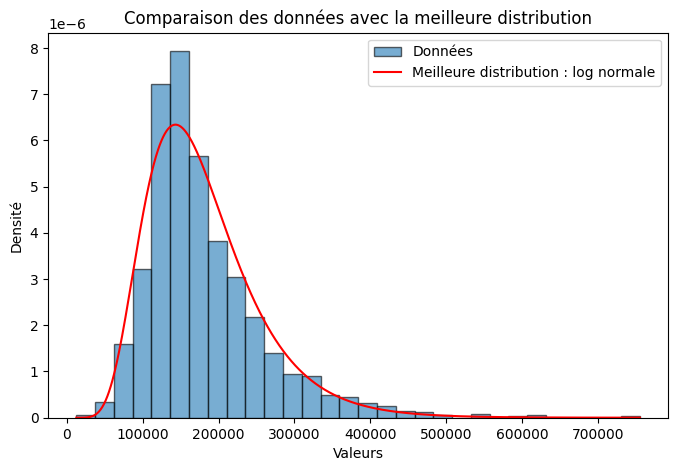

In [44]:
# Masquer les warnings
warnings.filterwarnings("ignore")

# Liste des distributions à tester
distributions = {
    "exponentielle": expon,
    "normale": norm,
    "gamma": gamma,
    "pareto": pareto,
    "beta": beta,
    "weibull_min": weibull_min,
    "log normale": lognorm,
    "cauchy": cauchy
}

# Fonction pour tester chaque distribution
results = []

for name, dist in distributions.items():
    try:
        # Ajustement des paramètres de la distribution
        params = dist.fit(data.SalePrice)
        
        # Test de Kolmogorov-Smirnov
        # H0 : La variable suit la loi donnée
        # H1 : La variable ne suit pas la loi donnée
        statistic, p_value = kstest(data.SalePrice, dist.name, args=params)

        results.append({
            "distribution": name,
            "statistic": statistic,
            "p_value": p_value,
            "parameters": params
        })

        print(f"Distribution: {name}")
        print(f"  KS Statistic: {statistic:.4f}")
        print(f"  p-value: {p_value}")
        if p_value < 0.05:
            print("  La distribution est significativement rejetée")
        else:
            print("  La distribution n'est pas significativement rejetée")
        print()

    except Exception as e:
        print(f"Distribution '{name}' a échoué : {e}")
        print()

# Recherche de la meilleure distribution
best_fit = results[np.argmax([result["p_value"] for result in results])]
best_dist = distributions[best_fit["distribution"]]
best_params = best_fit["parameters"]

# Histogramme des données
plt.figure(figsize=(8, 5))
plt.hist(data.SalePrice, bins=30, density=True, alpha=0.6, edgecolor='black', label="Données")

# Courbe de la distribution ajustée
x = np.linspace(min(data.SalePrice), max(data.SalePrice), 1000)
pdf = best_dist.pdf(x, *best_params)
plt.plot(x, pdf, 'r-', label=f"Meilleure distribution : {best_fit['distribution']}")

plt.title("Comparaison des données avec la meilleure distribution")
plt.xlabel("Valeurs")
plt.ylabel("Densité")

plt.legend()
plt.show()


La loi log normale semble être la plus adaptée pour nos données.

En effet, bien que le test de cette loi est non significatif à 5% (p-valeur à 1.83e-05 < 0.05) donc on ne rejette pas significativement l'hyupothèse H0 et on conclut que la loi n'est pas significativement adaptée à notre distribution.

Mais, cependant au vue de la statistique de test à 0.044, on conclut que celle loi reste la meilleure pour approcher nos données.

**Si une variable suit une loi lognormale**, alors le logarithme naturel de cette variable suit une loi normale. C'est une propriété fondamentale de la loi lognormale.

En effet,
- Une variable $ X $ suit une loi lognormale si $ X > 0 $ et si $ \ln(X) $ (le logarithme naturel de $ X $) suit une loi normale.
- Formellement, si $ X \sim \text{LogNormal}$mu, \sigma^2) $, alors $ \ln(X) \sim \mathcal{N}$mu, \sigma^2) $.

Cette propriété est souvent utilisée en modélisation et en statistique pour transformer des données fortement asymétriques (comme les prix) en une distribution plus normale, facilitant l'analyse et l'application de modèles statistiques.

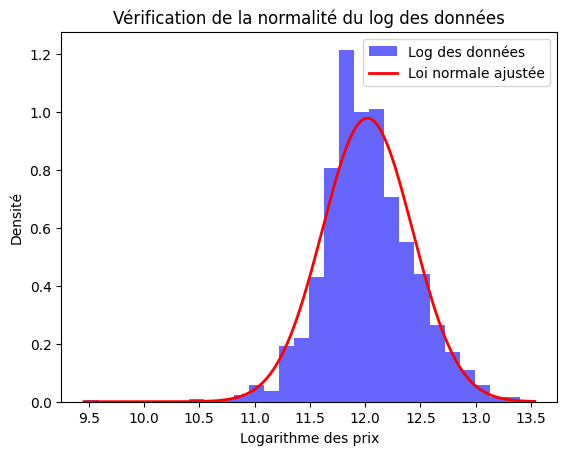

In [45]:
# Prenons le logarithme naturel des données
log_data = np.log(data.SalePrice)

# Vérification visuelle (histogramme)
plt.hist(log_data, bins=30, density=True, alpha=0.6, color="blue", label="Log des données")

# Tracer la densité normale estimée
mu, std = norm.fit(log_data)  # Moyenne et écart-type estimés
x = np.linspace(min(log_data), max(log_data), 1000)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r-', lw=2, label="Loi normale ajustée")

plt.title("Vérification de la normalité du log des données")
plt.xlabel("Logarithme des prix")
plt.ylabel("Densité")
plt.legend()
plt.show()


# ETUDE DE LA VARIABLE ALEATOIRE D'INTERET

Définissons les notations 

In [46]:
# Variable aléatoire d'intérêt
X = log_data

# Taille de la population totale
N = len(X)

Notre étude se concentre sur l'estimation des paramètres de la loi de $X$.

Rappelons que la **loi normale** est paramétrée par deux paramètres :  

- **$ \mu $** : la moyenne, qui détermine la position centrale de la distribution et qu'on notera **mu**.  
- **$ \sigma $** : l'écart-type, qui mesure la dispersion des valeurs autour de la moyenne et qu'on notera **var**.  

Ces deux paramètres permettent de définir entièrement la densité de probabilité de la loi normale.  

L'objectif est souvent d'estimer mu et sigma à partir des données observées pour ajuster un modèle ou vérifier l'adéquation à une loi normale.  

On considère un n-échantillon $x$ = ($x_1, x_2, ..., x_n$) de notre variable aléatoire

Pour déterminer la taille minimale $ n $ d’un échantillon $ x $ qui permet de modéliser correctement la même moyenne $ \mu $ et le même écart-type $ \sigma $ que la variable $ X $, nous pouvons utiliser le concept de **marge d'erreur** pour des estimateurs comme la moyenne.
On considèrera que la moyenne et la variance sont connues uniquement pour cette étape.

- **Fixer un niveau de confiance** :  
   Par exemple, un intervalle de confiance à 95 %, soit $ z = 1.96 $.

- **Choisir une marge d'erreur acceptable $ E $** :  
   Cette marge est l’écart maximum toléré entre la moyenne estimée à partir de l’échantillon et la vraie moyenne de $ X $.

- **Formule pour $ n $** :  
   Si $ X $ suit une loi normale, la taille $ n $ est donnée par :  
   $$ 
   n = \left( \frac{z \cdot \sigma}{E} \right)^2 
   $$

   Où :  
   - $z$ : quantile associé au niveau de confiance.  
   - $ \sigma $ : écart-type de la population.  
   - $ E $ : marge d'erreur choisie.  

La valeur obtenue pour $ n $ sera le nombre minimal d’observations requis pour garantir que l'échantillon modélise correctement la moyenne et l'écart-type, avec une marge d'erreur $ E $ donnée et un niveau de confiance fixé.



In [47]:
# Calculons le n optimal minimal pour un intervalle de confiance de 95% et une erreur de 0.05 sur la moyenne
n = int((1.96 * X.std() / 0.05) ** 2)+1

print(f"Taille minimale de l'échantillon (n) : {n}")


Taille minimale de l'échantillon (n) : 256


In [48]:
# n-échantillon aléatoire x
x = X.sample(n=n)


## Estimations des paramètres

### Estimateurs plug-in

La **méthode des estimateurs plug-in** est une approche intuitive et puissante pour estimer les paramètres d'une distribution comme la moyenne, la variance en remplaçant les quantités théoriques par leurs équivalents empiriques calculés à partir de l'échantillon.

- **Moyenne plug-in** :
   $$
   \hat{\mu}_{\text{plug-in}} = \frac{1}{n} \sum_{i=1}^n x_i
   $$

- **Variance plug-in** :
   $$
   \hat{\sigma}^2_{\text{plug-in}} = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu}_{\text{plug-in}})^2
   $$

In [49]:
mu_plug_in = np.mean(x)
var_plug_in = np.var(x)

print(f"Estimateur des moments de la moyenne (μ): {mu_plug_in:.4f}")
print(f"Estimateur des moments de la variance (σ²): {var_plug_in:.4f}")

Estimateur des moments de la moyenne (μ): 12.0137
Estimateur des moments de la variance (σ²): 0.1728


### Estimateurs des moments

La **méthode des moments** consiste à égaler les moments théoriques et empiriques.

Pour une **loi normale**, les deux premiers moments sont particulièrement importants :

- Le **premier moment** (la moyenne) est donné par : $ \mu $

- Le **deuxième moment centré** (la variance) est donné par :  $
  \sigma^2
  $

En utilisant les moments empiriques (c'est-à-dire la moyenne $(\hat{\mu})$ et la variance $(\hat{\sigma}^2)$ calculées à partir des données), on peut directement estimer les paramètres de la loi normale.

Les **estimateurs des moments** pour une loi normale sont donc :

- La moyenne estimée :

  $$
  \hat{\mu}_{\text{moment}} = \frac{1}{n} \sum_{i=1}^n x_i
  $$

- La variance estimée :

  $$
  \hat{\sigma}^2_{\text{moment}} = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2
  $$

Ces estimateurs sont directement dérivés des données et permettent de caractériser entièrement la loi normale, car celle-ci est définie uniquement par sa moyenne et sa variance.


In [50]:
mu_moment = np.mean(x)
var_moment = np.var(x)

print(f"Estimateur des moments de la moyenne (μ): {mu_moment:.4f}")
print(f"Estimateur des moments de la variance (σ²): {var_moment:.4f}")

Estimateur des moments de la moyenne (μ): 12.0137
Estimateur des moments de la variance (σ²): 0.1728


### Estimateurs du maximum de vraisemblance

**Log-Vraisemblance**

Pour faciliter les calculs, on utilise souvent le logarithme de la vraisemblance, appelé log-vraisemblance. La log-vraisemblance pour une loi normale devient :

$$
\ell(\mu, \sigma^2) = \log L(\mu, \sigma^2) = -\frac{n}{2} \log(2\pi) - \frac{n}{2} \log(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (_i - \mu)^2
$$

Les termes constants (comme $-\frac{n}{2} \log(2\pi)$) ne dépendent pas des paramètres $\mu$ et $\sigma^2$, donc ils peuvent être ignorés dans l'optimisation.


**Maximisation de la Log-Vraisemblance**

Pour maximiser la log-vraisemblance par rapport à $\mu$ et $\sigma^2$, on dérive la log-vraisemblance par rapport à ces paramètres et on résout les équations obtenues.


**Maximisation par rapport à $\mu$** : Dérivons $\ell(\mu, \sigma^2)$ par rapport à $\mu$ et égalisons à zéro pour obtenir l'estimateur de $\mu$ :

$$
\frac{\partial \ell(\mu, \sigma^2)}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \mu) = 0
$$

Résolvons cette équation pour $\mu$ :

$$
\sum_{i=1}^{n} (X_i - \mu) = 0 \implies \mu = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

Ainsi, l'estimateur de $\mu$ est simplement la moyenne empirique des observations.


**Maximisation par rapport à $\sigma^2$** : Dérivons la log-vraisemblance par rapport à $\sigma^2$ et égalisons à zéro :

$$
\frac{\partial \ell(\mu, \sigma^2)}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (X_i - \mu)^2 = 0
$$

Résolvons cette équation pour $\sigma^2$ :

$$
-\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (X_i - \mu)^2 = 0 \implies \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \mu)^2
$$

Ainsi, l'estimateur de $\sigma^2$ est la variance empirique des observations.


**Estimateurs du Maximum de Vraisemblance (EMV)**

Les estimateurs du maximum de vraisemblance pour une loi normale sont donc :

- **Estimateur de $\mu$** :

  $$
  \hat{\mu}_{\text{EMV}} = \frac{1}{n} \sum_{i=1}^{n} X_i
  $$

- **Estimateur de $\sigma^2$** :

  $$
  \hat{\sigma}^2_{\text{EMV}} = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})^2
  $$

  

Ces estimateurs sont directement dérivés des données et permettent de caractériser entièrement la loi normale, car celle-ci est définie uniquement par sa moyenne et sa variance.

In [51]:
mu_EMV = np.mean(x)
var_EMV = np.var(x)

print(f"Estimateur du Maximum vraisemblance de la moyenne (μ): {mu_EMV:.4f}")
print(f"Estimateur du maximum vraisemblance de la variance (σ²): {var_EMV:.4f}")

Estimateur du Maximum vraisemblance de la moyenne (μ): 12.0137
Estimateur du maximum vraisemblance de la variance (σ²): 0.1728


### Estimateurs bayésien

La **méthode bayésienne** est une approche probabiliste pour l'estimation des paramètres d'une distribution. Contrairement aux méthodes fréquentistes (comme les estimateurs des moments ou plug-in), l'approche bayésienne intègre des **croyances a priori** sur les paramètres, qui sont mises à jour à l'aide des données observées pour obtenir une **distribution a posteriori**. Les estimateurs bayésiens sont ensuite dérivés de cette distribution a posteriori.

- **Distribution a priori pour $\mu$ et $\sigma^2$** :
   - Pour $\mu$, on choisit souvent une distribution a priori normale :
     $$
     \mu \sim \mathcal{N}(\mu_0, \tau_0^2)
     $$
     où $\mu_0$ est la moyenne a priori et $\tau_0^2$ est la variance a priori.
   - Pour $\sigma^2$, on choisit souvent une distribution a priori inverse-gamma :
     $$
     \sigma^2 \sim \text{Inv-Gamma}(\alpha_0, \beta_0)
     $$
     où $\alpha_0$ et $\beta_0$ sont les hyperparamètres de la distribution inverse-gamma.

- **Vraisemblance des données** :
   La vraisemblance des données, étant donné $\mu$ et $\sigma^2$, est :
   $$
   p(x \mid \mu, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
   $$

- **Distribution a posteriori** :
   La distribution a posteriori combine la vraisemblance des données et les distributions a priori :
   $$
   p(\mu, \sigma^2 \mid x) \propto p(x \mid \mu, \sigma^2) \cdot p(\mu) \cdot p(\sigma^2)
   $$




Ainsi, on détermine un :

- **Estimateur bayésien de $\mu$** :
   L'estimateur bayésien de $\mu$ est la moyenne de la distribution a posteriori de $\mu$. Si la distribution a posteriori est une loi normale, l'estimateur est donné par :
   $$
   \hat{\mu}_{\text{bayésien}} = \mathbb{E}[\mu \mid x] = \frac{\tau_0^2 \cdot \bar{x} + \sigma^2 \cdot \mu_0}{\tau_0^2 + \sigma^2}
   $$
   où $\bar{x}$ est la moyenne empirique de l'échantillon.

- **Estimateur bayésien de $\sigma^2$** :
   L'estimateur bayésien de $\sigma^2$ est la moyenne de la distribution a posteriori de $\sigma^2$. Si la distribution a posteriori est une loi inverse-gamma, l'estimateur est donné par :
   $$
   \hat{\sigma}^2_{\text{bayésien}} = \mathbb{E}[\sigma^2 \mid x] = \frac{\beta_0 + \frac{1}{2} \sum_{i=1}^n (x_i - \mu)^2}{\alpha_0 + \frac{n}{2} - 1}
   $$


In [52]:
# Hyperparamètres a priori pour μ (loi normale)
mu_0 = 0    # Moyenne
tau_0_sq = 1  # Variance

# Hyperparamètres a priori pour σ² (loi inverse-gamma)
alpha_0 = 1  # Paramètre α₀
beta_0 = 1   # Paramètre β₀


# Calcul des statistiques empiriques de l'échantillon
mu_obs = np.mean(x) 
var_obs = np.var(x)


# MAJ des hyperparamètres a posteriori de μ
tau_n_sq = 1 / (1 / tau_0_sq + n / var_obs)  # Variance
mu_n = tau_n_sq * (mu_0 / tau_0_sq + n * mu_obs / var_obs)  # Moyenne

# MAJ des hyperparamètres a posteriori de σ²
alpha_n = alpha_0 + n / 2  # Paramètre α
beta_n = beta_0 + 0.5 * np.sum((x - mu_obs) ** 2)  # Paramètre β


# Calcul des estimateurs bayésiens
mu_bayes = mu_n
var_bayes = beta_n / (alpha_n - 1)

# Affichage des résultats
print(f"Estimateur bayésien de μ (moyenne): {mu_bayes:.4f}")
print(f"Estimateur bayésien de σ² (variance): {var_bayes:.4f}")

Estimateur bayésien de μ (moyenne): 12.0056
Estimateur bayésien de σ² (variance): 0.1806


## Biais et EQM des estimateurs

Nos estimateurs Plug-in, des moments et du maximum vraisemblance étant les mêmes on ne calculera que le biais d'un d'entre eux ce qui, selon leur définition revient à travailler sur la moyenne et la variance empirique.

   $$
   \hat{\mu}_{\text{plug-in}} = \hat{\mu}_{\text{moment}} = \hat{\mu}_{\text{EMV}} = \frac{1}{n} \sum_{i=1}^n x_i
   $$


   $$
   \hat{\sigma}^2_{\text{plug-in}} = \hat{\sigma}^2_{\text{moment}} = \hat{\sigma}^2_{\text{EMV}} = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})^2
   $$

### Biais

Le biais d’un estimateur $\hat{\theta}$ est défini par

$$
\text{Biais}(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta
$$

##### Estimateurs Plug-in, des Moments et du Maximum Vraisemblance

- **Biais de l'estimateur de la moyenne ($\hat{\mu}$)**

L'espérance de $\hat{\mu}$ est donnée par :

$$
  \mathbb{E}[\hat{\mu}] = \mathbb{E}\left[\frac{1}{n} \sum_{i=1}^n x_i\right] = \frac{1}{n} \sum_{i=1}^n \mathbb{E}[x_i]
$$

*Comme chaque $x_i$ est issu d'une distribution de moyenne $\mu$, nous avons $\mathbb{E}[x_i] = \mu$. Ainsi :*

$$
  \mathbb{E}[\hat{\mu}] = \frac{1}{n} \sum_{i=1}^n \mu = \frac{1}{n} \cdot n \mu = \mu
$$

*Donc :*
  $$
  \text{Biais}(\hat{\mu}) = \mathbb{E}[\hat{\mu}] - \mu = \mu - \mu = 0
  $$

> L'estimateur de la moyenne $\hat{\mu}$ est **sans biais**.


- **Biais de l'estimateur de la variance ($\hat{\sigma}^2$)**

Pour calculer l'espérance de $\hat{\sigma}^2$, nous savons que :

  $$
  \mathbb{E}[\hat{\sigma}^2] = \mathbb{E}\left[\frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2\right]
  $$

  En développant cette expression, on peut montrer que :

  $$
  \mathbb{E}[\hat{\sigma}^2] = \frac{n-1}{n} \sigma^2
  $$

Le biais de $\hat{\sigma}^2$ est alors donné par :

  $$
  \text{Biais}(\hat{\sigma}^2) = \mathbb{E}[\hat{\sigma}^2] - \sigma^2 = \frac{n-1}{n} \sigma^2 - \sigma^2 = -\frac{\sigma^2}{n}
  $$

> L'estimateur de la variance $\hat{\sigma}^2$ est **biaisé**.

In [59]:
# Calcul des biais des estimateurs
biais_mu = 0
biais_var = - x.var() / n

# Affichage des biais
print(f"Biais de l'estimateur de la moyenne: {biais_mu:.4f}")
print(f"Biais de l'estimateur de la variance: {biais_var:.4f}")

Biais de l'estimateur de la moyenne: 0.0000
Biais de l'estimateur de la variance: -0.0007



- **Correction du Biais pour la Variance**

Pour obtenir un estimateur sans biais de la variance, on utilise souvent l'estimateur corrigé suivant :

$$
\hat{\sigma}^2_{\text{corrigé}} = \frac{1}{n-1} \sum_{i=1}^n (x_i - \hat{\mu})^2
$$

- L'espérance de l'estimateur corrigé ets donnée par :

  $$
  \mathbb{E}[\hat{\sigma}^2_{\text{corrigé}}] = \sigma^2
  $$

- Le biais de l'estimateur corrigé ets donné par :

  $$
  \text{Biais}(\hat{\sigma}^2_{\text{corrigé}}) = \mathbb{E}[\hat{\sigma}^2_{\text{corrigé}}] - \sigma^2 = 0
  $$

> L'estimateur corrigé de la variance $\hat{\sigma}^2_{\text{corrigé}}$ est **sans biais**.

In [53]:
# Estimateur corrigé de la variance (sans biais)
var_corrigee = np.var(x)  

print(f"Estimateur corrigé de la variance (sans biais): {var_corrigee:.4f}")

Estimateur corrigé de la variance (sans biais): 0.1728


#### Estimateurs bayésiens

**Rappel des Estimateurs Bayésiens**
   $$
   \hat{\mu}_{\text{bayésien}} = \mathbb{E}[\mu \mid x] = \mu_n
   $$

   $$
   \hat{\sigma}^2_{\text{bayésien}} = \mathbb{E}[\sigma^2 \mid x] = \frac{\beta_n}{\alpha_n - 1}
   $$


- **Biais de l'estimateur bayésien de $\mu$**

L'estimateur bayésien de $\mu$ est la moyenne a posteriori $\mu_n$.

La moyenne a posteriori $\mu_n$ est une combinaison linéaire de la moyenne a priori $\mu_0$ et de la moyenne empirique $\bar{x}$. Sous certaines conditions (par exemple, lorsque les hyperparamètres a priori sont bien choisis), $\mu_n$ converge vers la vraie valeur $\mu$ lorsque la taille de l'échantillon $n$ augmente.

  Cependant, pour un échantillon fini, $\mu_n$ peut être biaisé en fonction des hyperparamètres a priori. Si les hyperparamètres a priori sont mal choisis (par exemple, si $\mu_0$ est très éloigné de la vraie valeur de $\mu$), l'estimateur bayésien peut être biaisé.

  $$
  \text{Biais}(\hat{\mu}_{\text{bayésien}}) = \mathbb{E}[\mu_n] - \mu
  $$

  Si les hyperparamètres a priori sont bien choisis (par exemple, $\mu_0$ proche de la vraie valeur de $\mu$), le biais sera faible. Sinon, le biais peut être significatif.


- **Biais de l'estimateur bayésien de $\sigma^2$**

L'estimateur bayésien de $\sigma^2$ est la moyenne a posteriori de $\sigma^2$, donnée par $\frac{\beta_n}{\alpha_n - 1}$. 

  La moyenne a posteriori de $\sigma^2$ dépend des hyperparamètres a priori ($\alpha_0$, $\beta_0$) et des données observées. Si les hyperparamètres a priori sont bien choisis, l'estimateur bayésien sera proche de la vraie valeur de $\sigma^2$.

  Cependant, comme pour $\mu$, si les hyperparamètres a priori sont mal choisis, l'estimateur bayésien peut être biaisé.

  $$
  \text{Biais}(\hat{\sigma}^2_{\text{bayésien}}) = \mathbb{E}\left[\frac{\beta_n}{\alpha_n - 1}\right] - \sigma^2
  $$

  Si les hyperparamètres a priori sont bien choisis, le biais sera faible. Sinon, le biais peut être significatif.





- **Correction du Biais pour les Estimateurs Bayésiens**

Contrairement aux estimateurs fréquentistes, les estimateurs bayésiens ne peuvent pas être facilement "corrigés" pour éliminer le biais, car leur biais dépend des distributions a priori et a posteriori. Cependant, on peut réduire le biais en choisissant des hyperparamètres a priori appropriés :

1. **Choix des hyperparamètres a priori** :
   - Pour $\mu$, choisissez $\mu_0$ proche de la vraie valeur de $\mu$ (si vous avez une idée de sa valeur).
   - Pour $\sigma^2$, choisissez $\alpha_0$ et $\beta_0$ de manière à ce que la distribution a priori soit peu informative (par exemple, $\alpha_0$ petit et $\beta_0$ petit).

2. **Utilisation de distributions a priori non informatives** :
   - Si vous n'avez pas d'information a priori, utilisez des distributions a priori non informatives (par exemple, une distribution a priori de Jeffreys pour $\sigma^2$).





In [54]:
# Calcul du biais des estimateurs bayésiens
bias_mu_bayes = mu_bayes - x.mean()
bias_var_bayes = var_bayes - x.var()

# Affichage des biais
print(f"Biais de l'estimateur bayésien de μ: {bias_mu_bayes:.4f}")
print(f"Biais de l'estimateur bayésien de σ²: {bias_var_bayes:.4f}")

Biais de l'estimateur bayésien de μ: -0.0081
Biais de l'estimateur bayésien de σ²: 0.0071


### Erreur quadratique moyenne

L'**erreur quadratique moyenne (EQM)** d'un estimateur $\hat{\theta}$ est une mesure de la qualité de l'estimateur qui prend en compte à la fois le **biais** et la **variance**. C'est une mesure globale de la qualité d'un estimateur et est particulièrement utile pour comparer différents estimateurs et choisir celui qui offre le meilleur compromis entre biais et variance.

Elle est définie par :

$$
\text{EQM}(\hat{\theta}) = \mathbb{E}\left[(\hat{\theta} - \theta)^2\right]
$$

L'**EQM** peut être décomposée en deux termes : le carré du biais et la variance de l'estimateur. Cette décomposition est connue sous le nom de **décomposition biais-variance** :

$$
\text{EQM}(\hat{\theta}) = \text{Biais}(\hat{\theta})^2 + \text{Var}(\hat{\theta})
$$

où $\text{Var}(\hat{\theta}) = \mathbb{E}\left[(\hat{\theta} - \mathbb{E}[\hat{\theta}])^2\right]$ est la variance de l'estimateur.




##### Estimateurs Plug-in, des Moments et du Maximum Vraisemblance

- **EQM de l'estimateur de la moyenne ($\hat{\mu}$)**

  - **Biais** : Comme nous l'avons vu précédemment, $\text{Biais}(\hat{\mu}) = 0$.
  - **Variance** : La variance de $\hat{\mu}$ est donnée par :
  $$
  \text{Var}(\hat{\mu}) = \frac{\sigma^2}{n}
  $$

  - **EQM** :
  $$
  \text{EQM}(\hat{\mu}) = \text{Biais}(\hat{\mu})^2 + \text{Var}(\hat{\mu}) = 0 + \frac{\sigma^2}{n} = \frac{\sigma^2}{n}
  $$

L'**EQM** de l'estimateur de la moyenne diminue avec la taille de l'échantillon $n$, ce qui montre que l'estimateur devient plus précis à mesure que $n$ augmente.


- **EQM de l'estimateur de la variance ($\hat{\sigma}^2$)**

  - **Biais** : Comme nous l'avons vu précédemment, $\text{Biais}(\hat{\sigma}^2) = -\frac{\sigma^2}{n}$ (l'estimateur est biaisé).
  - **Variance** : La variance de $\hat{\sigma}^2$ est donnée par :
  $$
  \text{Var}(\hat{\sigma}^2) = \frac{2\sigma^4}{n}
  $$

  - **EQM** :
  $$
  \text{EQM}(\hat{\sigma}^2) = \text{Biais}(\hat{\sigma}^2)^2 + \text{Var}(\hat{\sigma}^2) = \left(-\frac{\sigma^2}{n}\right)^2 + \frac{2\sigma^4}{n} = \frac{\sigma^4}{n^2} + \frac{2\sigma^4}{n}
  $$

L'**EQM** de l'estimateur de la variance diminue avec la taille de l'échantillon $n$, mais elle est plus élevée que celle de l'estimateur de la moyenne en raison du biais et de la variance plus importante.

In [57]:
# Calcul de l'EQM
eqm_mu = 0**2 + np.var(x) / n
eqm_var = np.var(x)**2/n**2 + 2*np.var(x)**2/n

# Affichage des résultats
print(f"EQM de l'estimateur de μ: {eqm_mu:.5f}")
print(f"EQM de l'estimateur de σ²: {eqm_var:.5f}")

EQM de l'estimateur de μ: 0.00067
EQM de l'estimateur de σ²: 0.00023


#### Estimateurs bayésiens

- **EQM de l'estimateur bayésien de la moyenne $(\hat{\mu}_{\text{bayésien}})$**

  - **Biais** : Comme nous l'avons vu précedemment, 
  $$
  \text{Biais}(\hat{\mu}_{\text{bayésien}}) = \mathbb{E}[\mu_n] - \mu
  $$

  - **Variance** :
  La variance de l'estimateur bayésien de $\mu$ est donnée par la variance a posteriori de $\mu$, notée $\tau_n^2$ :
  $$
  \text{Var}(\hat{\mu}_{\text{bayésien}}) = \tau_n^2
  $$

  - **EQM** :
  $$
  \text{EQM}(\hat{\mu}_{\text{bayésien}}) = (\mathbb{E}[\mu_n] - \mu)^2 + \tau_n^2
  $$


- **EQM de l'estimateur bayésien de la variance $(\hat{\sigma}^2_{\text{bayésien}})$**

  - **Biais** : Comme nous l'avons vu précedemment,
  $$
  \text{Biais}(\hat{\sigma}^2_{\text{bayésien}}) = \mathbb{E}\left[\frac{\beta_n}{\alpha_n - 1}\right] - \sigma^2
  $$

  - **Variance** :
  La variance de l'estimateur bayésien de $\sigma^2$ est donnée par la variance a posteriori de $\sigma^2$, qui peut être calculée à partir des paramètres de la distribution inverse-gamma a posteriori :
  $$
  \text{Var}(\hat{\sigma}^2_{\text{bayésien}}) = \frac{\beta_n^2}{(\alpha_n - 1)^2 (\alpha_n - 2)}
  $$

  - **EQM** :
  $$
  \text{EQM}(\hat{\sigma}^2_{\text{bayésien}}) = \left(\mathbb{E}\left[\frac{\beta_n}{\alpha_n - 1}\right] - \sigma^2\right)^2 + \frac{\beta_n^2}{(\alpha_n - 1)^2 (\alpha_n - 2)}
  $$


In [56]:
# Calcul de la variance des estimateurs bayésiens
var_mu_bayes = tau_n_sq  # Variance a posteriori de μ
var_var_bayes = beta_n**2 / ((alpha_n - 1)**2 * (alpha_n - 2))  # Variance a posteriori de σ²

# Calcul de l'EQM des estimateurs bayésiens
eqm_mu_bayes = bias_mu_bayes**2 + var_mu_bayes
eqm_var_bayes = bias_var_bayes**2 + var_var_bayes

# Affichage des résultats
print(f"EQM de l'estimateur bayésien de μ: {eqm_mu_bayes:.5f}")
print(f"EQM de l'estimateur bayésien de σ²: {eqm_var_bayes:.5f}")

EQM de l'estimateur bayésien de μ: 0.00074
EQM de l'estimateur bayésien de σ²: 0.00031


Concluons :

In [63]:
print('Estimateurs plug-in, des moments et du MV :')
print('-'*70)
print(f'Biais de l\'estimateur de la moyenne : {biais_mu:.4f}')
print(f'Biais de l\'estimateur de la variance : {biais_var:.4f}')
print('-'*50)
print(f'EQM de l\'estimateur de la moyenne : {eqm_mu:.5f}')
print(f'EQM de l\'estimateur de la variance : {eqm_var:.5f}')
print('-'*50)

print()

print('Estimateurs bayésiens :')
print('-'*70)
print(f'Biais de l\'estimateur de la moyenne : {bias_mu_bayes:.4f}')
print(f'Biais de l\'estimateur de la variance : {bias_var_bayes:.4f}')
print('-'*50)
print(f'EQM de l\'estimateur de la moyenne : {eqm_mu_bayes:.5f}')
print(f'EQM de l\'estimateur de la variance : {eqm_var_bayes:.5f}')
print('-'*50)

Estimateurs plug-in, des moments et du MV :
----------------------------------------------------------------------
Biais de l'estimateur de la moyenne : 0.0000
Biais de l'estimateur de la variance : -0.0007
--------------------------------------------------
EQM de l'estimateur de la moyenne : 0.00067
EQM de l'estimateur de la variance : 0.00023
--------------------------------------------------

Estimateurs bayésiens :
----------------------------------------------------------------------
Biais de l'estimateur de la moyenne : -0.0081
Biais de l'estimateur de la variance : 0.0071
--------------------------------------------------
EQM de l'estimateur de la moyenne : 0.00074
EQM de l'estimateur de la variance : 0.00031
--------------------------------------------------


On peut conclure que les estimateurs plug-in, des moments et du MV sont meilleurs que les estimateurs bayésiens pour la moyenne et la variance.

## Convergences et consistances des estimateurs

Nous avons deux estimateurs dans notre cas : $\hat{\mu}$, l'estimateur de la moyenne, et $\hat{\sigma}^2$, l'estimateur de la variance.

L'estimateur $\hat{\mu}$ est donné par :
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i.
$$

L'estimateur $\hat{\sigma}^2$ est donné par :
$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2.
$$

### Convergence presque sûre

Pour montrer que $\hat{\mu}$ et $\hat{\sigma}^2$ convergent presque sûrement vers $\mu$ et $\sigma^2$, respectivement, nous utilisons directement la **loi forte des grands nombres**. Cette loi stipule que les moyennes empiriques convergent presque sûrement vers leurs espérances théoriques lorsque la taille de l'échantillon augmente.

- **Convergence presque sûre  de $\hat{\mu}$**

Selon la **loi forte des grands nombres** (L.F.G.N.), la moyenne empirique $\hat{\mu}$ converge presque sûrement vers la moyenne théorique $\mu$ :
$$
\hat{\mu} \xrightarrow{p.s.} \mu
$$

- **Convergence presque sûre  de $\hat{\sigma}^2$**

De même, la variance empirique $\hat{\sigma}^2$ converge presque sûrement vers la variance théorique $\sigma^2$ :
$$
\hat{\sigma}^2 \xrightarrow{p.s.} \sigma^2
$$







### Consistance forte

Un estimateur est dit **fortement consistant** s'il converge presque sûrement vers la valeur réelle du paramètre qu'il estime. Cette notion est plus forte que la consistance simple (convergence en probabilité), car elle garantit une convergence presque certaine.

- **Consistance Forte de $\hat{\mu}$**

D'après la **loi forte des grands nombres**, la moyenne empirique $\hat{\mu}$ converge presque sûrement vers la moyenne théorique $\mu$ :
$$
\hat{\mu} \xrightarrow{a.s.} \mu.
$$
Cela signifie que $\hat{\mu}$ est un estimateur **fortement consistant** de $\mu$.

- **Consistance Forte de $\hat{\sigma}^2$

De même, la variance empirique $\hat{\sigma}^2$ converge presque sûrement vers la variance théorique $\sigma^2$ :
$$
\hat{\sigma}^2 \xrightarrow{a.s.} \sigma^2.
$$
Cela signifie que $\hat{\sigma}^2$ est un estimateur **fortement consistant** de $\sigma^2$.

### Convergence en probabilité


La **convergence en probabilité** est une notion plus faible que la convergence presque sûre, mais elle est souvent plus facile à établir. Un estimateur $\hat{\theta}$ converge en probabilité vers une valeur $\theta$ si, pour tout $\epsilon > 0$, on a :
$$
\lim_{n \to \infty} P(|\hat{\theta} - \theta| > \epsilon) = 0.
$$

- **Convergence en Probabilité de $\hat{\mu}$**

D'après la **loi faible des grands nombres**, la moyenne empirique $\hat{\mu}$ converge en probabilité vers la moyenne théorique $\mu$ :
$$
\hat{\mu} \xrightarrow{P} \mu.
$$

- **Convergence en Probabilité de $\hat{\sigma}^2$**

De même, la variance empirique $\hat{\sigma}^2$ converge en probabilité vers la variance théorique $\sigma^2$ :
$$
\hat{\sigma}^2 \xrightarrow{P} \sigma^2.
$$

### Convergence en loi

La **convergence en loi** (ou convergence en distribution) est une propriété importante qui décrit comment la distribution d'un estimateur se rapproche de la distribution d'une variable aléatoire théorique lorsque la taille de l'échantillon augmente.

- **Convergence en Loi de $\hat{\mu}$**

D'après le **théorème central limite (TCL)**, la moyenne empirique $\hat{\mu}$ suit approximativement une distribution normale lorsque la taille de l'échantillon $n$ est grande. Plus précisément, nous avons :
$$
\sqrt{n} (\hat{\mu} - \mu) \xrightarrow{d} \mathcal{N}(0, \sigma^2),
$$
où $\sigma^2$ est la variance de la population. Cela signifie que :
$$
\hat{\mu} \xrightarrow{d} \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right).
$$

Ainsi, $\hat{\mu}$ converge en loi vers une distribution normale centrée en $\mu$ et de variance $\frac{\sigma^2}{n}$.

- **Convergence en Loi de $\hat{\sigma}^2$**

Pour la variance empirique $\hat{\sigma}^2$, on peut montrer que :
$$
\sqrt{n} (\hat{\sigma}^2 - \sigma^2) \xrightarrow{d} \mathcal{N}(0, \tau^2),
$$
où $\tau^2$ est la variance asymptotique de $\hat{\sigma}^2$. Dans le cas d'une distribution normale, on a :
$$
\tau^2 = 2\sigma^4.
$$

Ainsi, $\hat{\sigma}^2$ converge en loi vers une distribution normale centrée en $\sigma^2$ et de variance $\frac{2\sigma^4}{n}$.


Pour resumer :

- **Convergence presque sûre** : 
  $$
  \hat{\mu} \xrightarrow{a.s.} \mu \quad \text{et} \quad \hat{\sigma}^2 \xrightarrow{a.s.} \sigma^2.
  $$

- **Consistance forte** : 
  $\hat{\mu}$ et $\hat{\sigma}^2$ sont des estimateurs **fortement consistants**.

- **Convergence en probabilité** : 
  $$

  \hat{\mu} \xrightarrow{P} \mu \quad \text{et} \quad \hat{\sigma}^2 \xrightarrow{P} \sigma^2.
  $$
  
- **Convergence en loi** : 
  $$
  \hat{\mu} \xrightarrow{d} \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right) \quad \text{et} \quad \hat{\sigma}^2 \xrightarrow{d} \mathcal{N}\left(\sigma^2, \frac{2\sigma^4}{n}\right).
  $$

Ces résultats montrent que $\hat{\mu}$ et $\hat{\sigma}^2$ sont des estimateurs robustes qui deviennent de plus en plus précis lorsque la taille de l'échantillon augmente. La convergence en probabilité, la convergence presque sûre, la consistance forte et la convergence en loi permettent de comprendre comment ces estimateurs se comportent asymptotiquement, ce qui est utile pour construire des intervalles de confiance ou effectuer des tests d'hypothèses.

Implémentons la **convergence presque sûre** des estimateurs de la moyenne et de la variance vers leurs valeurs théoriques. 

On va simuler plusieurs échantillon aléatoire de notre variable $X$ et observer l'évolution des valeurs des estimateurs empiriques de la moyenne et de la variance issus de chaque échantillon.

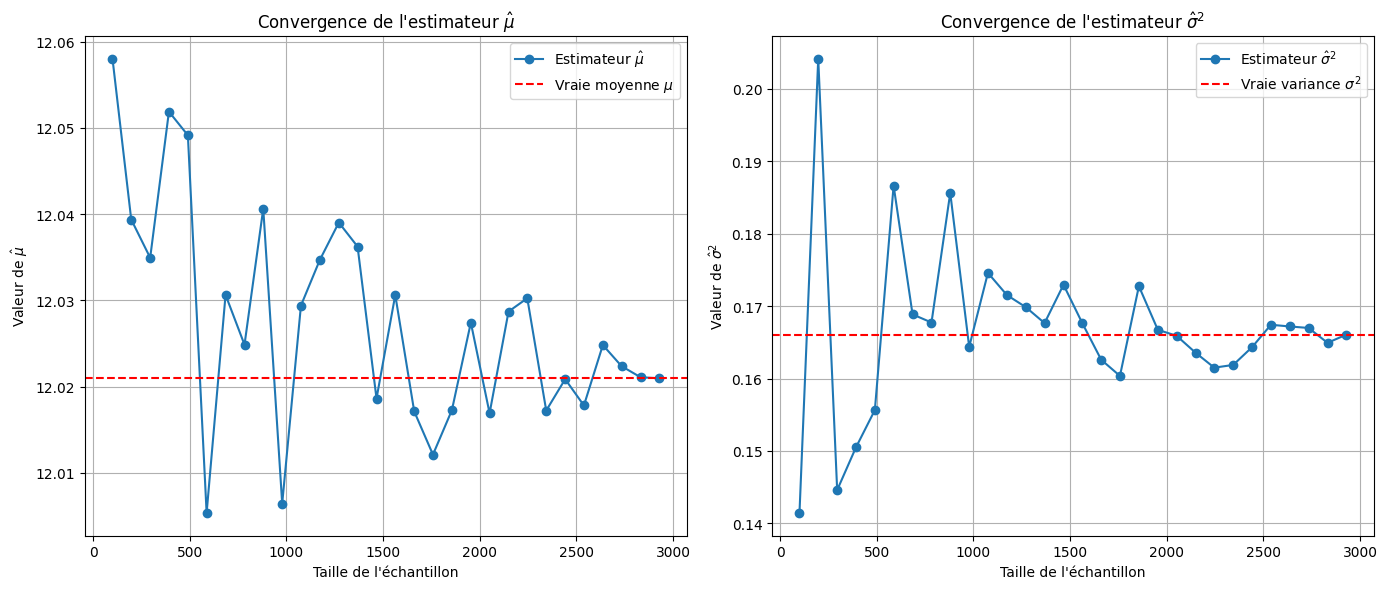

In [81]:
# Simulation de convergence presque sûre
true_mu = np.mean(X)  # Vraie moyenne théorique
true_var = np.var(X)  # Vraie variance théorique


# On utilise des échantillons de tailles croissantes (de 100 à 1000) pour estimer la moyenne et la variance.
# Pour chaque taille d'échantillon, on effectue un échantillonnage aléatoire et on calcule les estimateurs de la moyenne et de la variance.

sample_sizes = np.linspace(100, N, 30, dtype=int)  # Vecteurs des tailles d'échantillons croissantes
mean_estimates = []
var_estimates = []

for size in sample_sizes:
    sample = X.sample(n=size) # Echantillon aléatoire
    sample_mean = np.mean(sample)  # Estimation de la moyenne
    sample_var = np.var(sample, ddof=0)  # Estimation de la variance (populationnelle)
    mean_estimates.append(sample_mean)
    var_estimates.append(sample_var)


# Tracer la convergence de la moyenne
plt.figure(figsize=(14, 6))

# Convergence de la moyenne
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, mean_estimates, label="Estimateur $\hat{\mu}$", marker='o')
plt.axhline(y=true_mu, color='r', linestyle='--', label="Vraie moyenne $\mu$")
plt.title("Convergence presque sûre de l'estimateur $\hat{\mu}$")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Valeur de $\hat{\mu}$")
plt.legend()
plt.grid()

# Convergence de la variance
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, var_estimates, label="Estimateur $\hat{\sigma}^2$", marker='o')
plt.axhline(y=true_var, color='r', linestyle='--', label="Vraie variance $\sigma^2$")
plt.title("Convergence presque sûre de l'estimateur $\hat{\sigma}^2$")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Valeur de $\hat{\sigma}^2$")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

On peut se rendre compte que nos moyennes et variances empiriques tendent vers les théoriques au fur et à mesure que la taille de l'échantillon croit.

Implémentons maintenant la **convergence en loi** des nos estimateurs.

Pour se faire, on réalisera 1000 500-échantillon aléatoire (500>n la taille minimale optimale calculée au préalable) de notre variable aléatoire $X$ et on observe la distribution des moyennes et des variances de tous les echantillons.

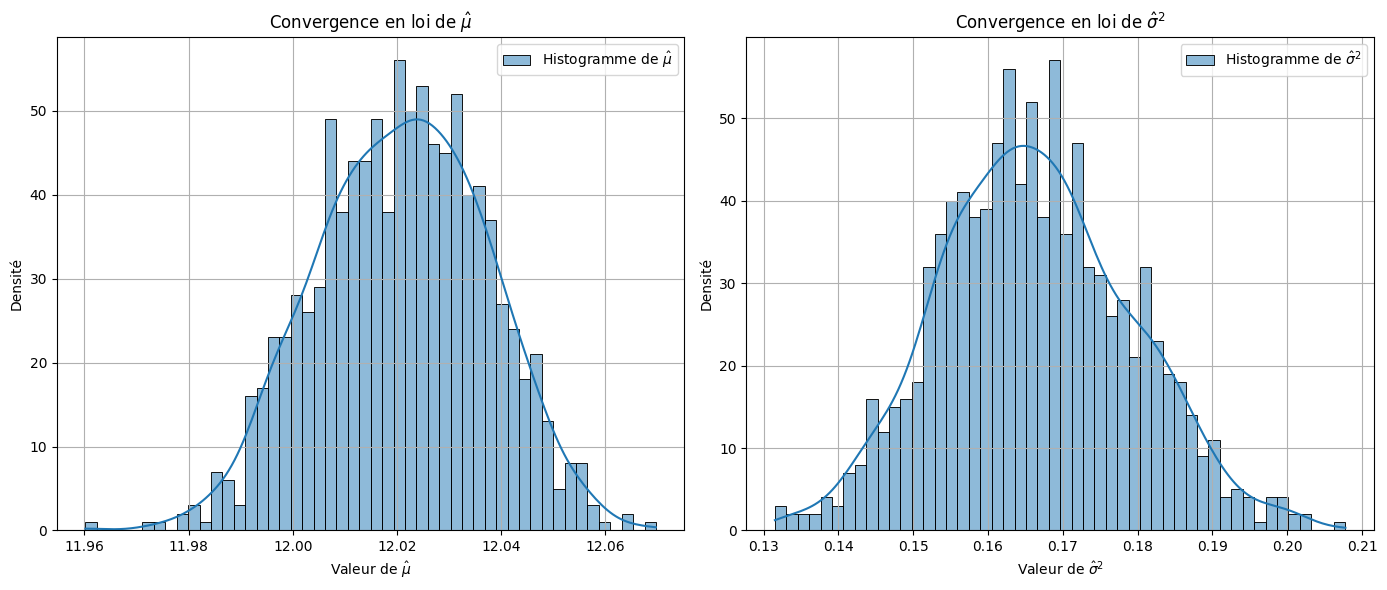

Distributions de la moyenne :
--------------------------------------------------
Moyenne empirique : 12.0209
Variance empirique : 0.0003
------------------------------

Distributions de la variance :
--------------------------------------------------
Moyenne empirique : 0.1662
Variance empirique : 0.0002
------------------------------


In [85]:
# Simulation de convergence en loi
sample_size = 500  # Taille d'échantillon fixe
n_simulations = 1000  # Nombre de simulations

mean_simulations = []
var_simulations = [] 

for _ in range(n_simulations):
    sample = X.sample(n=sample_size) # Echantillon aléatoire
    sample_mean = np.mean(sample)
    sample_var = np.var(sample)
    mean_simulations.append(sample_mean)
    var_simulations.append(sample_var)

# Tracer l'histogramme de la moyenne
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(mean_simulations, bins=50, kde=True, edgecolor='black', label="Histogramme de $\hat{\mu}$")
plt.title("Convergence en loi de $\hat{\mu}$")
plt.xlabel("Valeur de $\hat{\mu}$")
plt.ylabel("Densité")
plt.legend()
plt.grid()

# Tracer l'histogramme de la variance
plt.subplot(1, 2, 2)
sns.histplot(var_simulations, bins=50, kde=True, edgecolor='black', label="Histogramme de $\hat{\sigma}^2$")
plt.title("Convergence en loi de $\hat{\sigma}^2$")
plt.xlabel("Valeur de $\hat{\sigma}^2$")
plt.ylabel("Densité")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Affichage des résultats
print(f'Distributions de la moyenne :')
print('-'*50)
print(f'Moyenne empirique : {np.mean(mean_simulations):.4f}')
print(f'Variance empirique : {np.var(mean_simulations):.4f}')
print('-'*30)

print()

print(f'Distributions de la variance :')
print('-'*50)
print(f'Moyenne empirique : {np.mean(var_simulations):.4f}')
print(f'Variance empirique : {np.var(var_simulations):.4f}')
print('-'*30)


On constate bien que les distributions sont proches du gaussienne comme supposé.